In [1]:
import pickle as pck
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
# import pylandau as pland
# import ROOT
import sys
import scipy.ndimage as ndimage
import numpy.ma as ma
# from functions_MuonsNSAMP1 import diffution_vertical_muon, check_flip_vertical_muon, check_flip_horizontal_muon, diffution_horizontal_muon

def gaussian(x, a, mean, sigma):
    return a * np.exp(-((x - mean)**2 / (2 * sigma**2)))
    

def diffution_curve(z, alpha, beta):
    return np.sqrt(np.abs(alpha * np.log(1 - (beta * z))))
    
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import A4, letter
from reportlab.lib.utils import ImageReader

In [2]:
plt.rcParams.update({
    "image.origin": "lower",
    "image.aspect": 1,
    #"text.usetex": True,
    "grid.alpha": .5,
    "axes.linewidth":2,
    "lines.linewidth" : 1,
    "font.size":    15.0,
    "xaxis.labellocation": 'right',  # alignment of the xaxis label: {left, right, center}
    "yaxis.labellocation": 'top',  # alignment of the yaxis label: {bottom, top, center}
    "xtick.top":           True ,  # draw ticks on the top side
    "xtick.major.size":    8    ,# major tick size in points
    "xtick.minor.size":    4      ,# minor tick size in points
    "xtick.direction":     'in',
    "xtick.minor.visible": True,
    "ytick.right":           True ,  # draw ticks on the top side
    "ytick.major.size":    8    ,# major tick size in points
    "ytick.minor.size":    4      ,# minor tick size in points
    "ytick.direction":     'in',
    "ytick.minor.visible": True,
    "ytick.major.width":   2   , # major tick width in points
    "ytick.minor.width":   1 ,
    "xtick.major.width":   2   , # major tick width in points
    "xtick.minor.width":   1 ,
    "legend.framealpha": 0 ,
    "legend.loc": 'best',

})

ColorMap = 'jet'

In [4]:
path = '/home/bruce/Documents/Programas/Catalogo_Eventos/CONNIE/dict__straight_muons_Extensions_1_to_4_Imgs_5_Elip_0.9_Sol_0.7_Skirts_1_with_sigmas_ADUs__NSAMP400.pkl'


histogram = open(path, 'rb')
data_histogram = pck.load(histogram)
histogram.close()

In [5]:
print('Llaves principales del diccionario: ', data_histogram.keys())
print('Llaves secundarias por extensión: ', data_histogram['extension_1'].keys(), end='\n\n')


print('Muones rectos y verticales detectados en total: ',data_histogram['All_Muons_Detected'])

Llaves principales del diccionario:  dict_keys(['All_Muons_Detected', 'extension_1'])
Llaves secundarias por extensión:  dict_keys(['charge', 'vertical_sigmas', 'Vertical_Events', 'horizontal_sigmas', 'Horizontal_Events'])

Muones rectos y verticales detectados en total:  1


In [8]:
matrix_ext_1_vertical = data_histogram['extension_1']['Vertical_Events']
matrix_ext_1_horizontal = data_histogram['extension_1']['Horizontal_Events']

print('Muones verticales en ext_1: ', len(matrix_ext_1_vertical))
# print('Muones verticales totales detectados: ', len(matrix_ext_1_vertical) + len(matrix_ext_2_vertical) + len(matrix_ext_4_vertical), end = '\n\n')

print('Muones horizontales en ext_1: ', len(matrix_ext_1_horizontal))
# print('Muones horizontales totales detectados: ', len(matrix_ext_1_horizontal) + len(matrix_ext_2_horizontal) + len(matrix_ext_4_horizontal))

Muones verticales en ext_1:  0
Muones horizontales en ext_1:  1


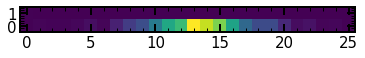

In [9]:
plt.imshow(matrix_ext_1_horizontal[0])